In [1]:
import os
import pandas as pd

In [2]:
def merge_csvs(folder_path):
    # Get list of all CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    
    # Initialize an empty dataframe to store merged data
    merged_df = pd.DataFrame()
    
    # Loop through each CSV file and merge its data into the main dataframe
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        merged_df = pd.concat([merged_df, df], ignore_index=True)
    
    return merged_df

In [3]:
# gmv_path = "/data/csc4801/WangLab/features_final/gmv"
# r2f_path = "/data/csc4801/WangLab/features_final/r2f"
# r2sn_path = "/data/csc4801/WangLab/features_final/r2sn"
# rmcs_path = "/data/csc4801/WangLab/features_final/rmcs"

# gmv_df = merge_csvs(gmv_path)
# r2f_df = merge_csvs(r2f_path)
# r2sn_df = merge_csvs(r2sn_path)
# rmcs_df = merge_csvs(rmcs_path)

In [9]:
gmv_df.to_csv("gmv.csv")
r2f_df.to_csv("r2f.csv")
r2sn_df.to_csv("r2sn.csv")
rmcs_df.to_csv("rmcs.csv")

In [2]:
gmv_df = pd.read_csv("gmv.csv")
r2f_df = pd.read_csv("r2f.csv")
r2sn_df = pd.read_csv("r2sn.csv")
rmcs_df = pd.read_csv("rmcs.csv")

In [4]:
gmv_df.set_index("PTID", inplace=True)
r2f_df.set_index("PTID", inplace=True)
r2sn_df.set_index("PTID", inplace=True)
rmcs_df.set_index("PTID", inplace=True)

In [5]:
gmv_df.drop(index = "test_PTID", inplace=True)

KeyError: "['test_PTID'] not found in axis"

In [32]:
# inputs: ptid, proper diagnosis
def rediagnose(ptid, diagnosis):
    print("Rediagnosing " + ptid + " to " + diagnosis)
    update = pd.DataFrame(data = {"PTID": [ptid], "diagnosis": [diagnosis]}, index = [ptid])
    try:
        test = gmv_df.loc[ptid]
        gmv_df.update(update)
    except Exception as e:
        print(str(e))
    try:
        test = r2f_df.loc[ptid]
        r2f_df.update(update)
    except Exception as e:
        print(str(e))
    try:
        test = r2sn_df.loc[ptid]
        r2sn_df.update(update)
    except Exception as e:
        print(str(e))
    try:
        test = rmcs_df.loc[ptid]
        rmcs_df.update(update)
    except Exception as e:
        print(str(e))

In [26]:
rediagnose("023_S_1104", "MCI")
rediagnose("023_S_0058", "NL")
rediagnose("057_S_0643", "NL")
rediagnose("099_S_0533", "NL")
rediagnose("082_S_0640", "NL")
rediagnose("005_S_0223", "NL")
rediagnose("021_S_0626", "MCI")
rediagnose("036_S_0869", "MCI")
rediagnose("005_S_0572", "MCI")
rediagnose("023_S_1190", "NL")
rediagnose("011_S_0022", "NL")
rediagnose("068_S_1191", "NL")

In [27]:
r2f_df["diagnosis"].value_counts()

AD     12
NL      8
MCI     4
Name: diagnosis, dtype: int64

In [28]:
gmv_df["diagnosis"].value_counts()

AD     12
NL      8
MCI     4
Name: diagnosis, dtype: int64

In [29]:
r2sn_df["diagnosis"].value_counts()

AD     12
NL      8
MCI     4
Name: diagnosis, dtype: int64

In [30]:
rmcs_df["diagnosis"].value_counts()

AD     12
NL      8
MCI     4
Name: diagnosis, dtype: int64

In [31]:
gmv_df

,Unnamed: 0,Unnamed: 0.1,diagnosis,scan_name,roi_0_gmv,roi_1_gmv,roi_2_gmv,roi_3_gmv,roi_4_gmv,roi_5_gmv,...,roi_236_gmv,roi_237_gmv,roi_238_gmv,roi_239_gmv,roi_240_gmv,roi_241_gmv,roi_242_gmv,roi_243_gmv,roi_244_gmv,roi_245_gmv
PTID,,,,,,,,,,,,,,,,,,,,,
099_S_0040,0,0,AD,latest_scan,0,0,0,23,0,316,...,0,1,0,10,0,1,0,0,0,0
099_S_0352,1,0,AD,latest_scan,162,104,0,0,0,0,...,200,187,61,166,66,40,49,205,145,146
005_S_0221,2,0,AD,latest_scan,0,0,0,0,0,0,...,57,100,10,187,43,21,18,171,29,104
136_S_0300,4,0,AD,latest_scan,0,0,0,20,0,3,...,0,0,0,0,0,0,0,0,0,0
023_S_0916,5,0,AD,latest_scan,0,17,0,156,0,745,...,0,0,0,0,0,0,0,0,0,0
126_S_0784,6,0,AD,latest_scan,4,16,0,26,0,319,...,0,4,0,0,0,0,0,13,0,0
127_S_0844,7,0,AD,latest_scan,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
023_S_1289,8,0,AD,latest_scan,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
027_S_0404,9,0,AD,latest_scan,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# This allowed?
r2sn_df = r2sn_df.fillna(1)
rmcs_df = rmcs_df.fillna(1)

In [10]:
from sklearn.svm import SVC

gmv_svm = SVC()
r2f_svm = SVC()
r2sn_svm = SVC()
rmcs_svm = SVC()

encoded_diagnosis = gmv_df['diagnosis'].astype('category').cat.codes
gmv_df["diagnosis"] = encoded_diagnosis
encoded_diagnosis = r2f_df['diagnosis'].astype('category').cat.codes
r2f_df["diagnosis"] = encoded_diagnosis
encoded_diagnosis = r2sn_df['diagnosis'].astype('category').cat.codes
r2sn_df["diagnosis"] = encoded_diagnosis
encoded_diagnosis = rmcs_df['diagnosis'].astype('category').cat.codes
rmcs_df["diagnosis"] = encoded_diagnosis

gmv_X = gmv_df.drop(['diagnosis', "scan_name", "Unnamed: 0", "Unnamed: 0.1"], axis=1)
gmv_y = gmv_df['diagnosis']
r2f_X = r2f_df.drop(['diagnosis', "scan_name", "Unnamed: 0"], axis=1)
r2f_y = r2f_df['diagnosis']
r2sn_X = r2sn_df.drop(['diagnosis', "scan_name", "Unnamed: 0"], axis=1)
r2sn_y = r2sn_df['diagnosis']
rmcs_X = rmcs_df.drop(['diagnosis', "scan_name", "Unnamed: 0"], axis=1)
rmcs_y = rmcs_df['diagnosis']

gmv_svm.fit(gmv_X, gmv_y)
r2f_svm.fit(r2f_X, r2f_y)
r2sn_svm.fit(r2sn_X, r2sn_y)
rmcs_svm.fit(rmcs_X, rmcs_y)

SVC()

In [11]:
y = gmv_df['diagnosis']
X = gmv_df.loc["023_S_1289"].drop(['diagnosis', "scan_name", "Unnamed: 0", "Unnamed: 0.1"]).to_numpy().reshape(-1, 1).T
# print(X)
gmv_svm.predict(X)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int8)

In [12]:
y = r2f_df['diagnosis']
X = r2f_df.loc["036_S_0869"].drop(['diagnosis', "scan_name", "Unnamed: 0"]).to_numpy().reshape(-1, 1).T

r2f_svm.predict(X)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int8)

In [13]:
y = r2sn_df['diagnosis']
X = r2sn_df.loc["023_S_1289"].drop(['diagnosis', "scan_name", "Unnamed: 0"]).to_numpy().reshape(-1, 1).T

r2sn_svm.predict(X)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int8)

In [14]:
y = rmcs_df['diagnosis']
X = rmcs_df.loc["023_S_1289"].drop(['diagnosis', "scan_name", "Unnamed: 0"]).to_numpy().reshape(-1, 1).T

rmcs_svm.predict(X)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int8)

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

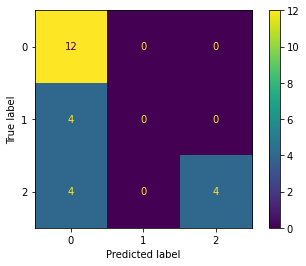

In [16]:
gmv_preds = gmv_svm.predict(gmv_X)

ConfusionMatrixDisplay(confusion_matrix(gmv_y, gmv_preds)).plot()

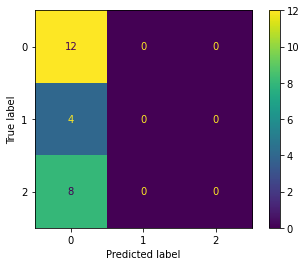

In [17]:
r2f_preds = r2f_svm.predict(r2f_X)

ConfusionMatrixDisplay(confusion_matrix(r2f_y, r2f_preds)).plot()

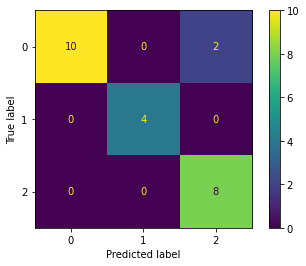

In [18]:
r2sn_preds = r2sn_svm.predict(r2sn_X)

ConfusionMatrixDisplay(confusion_matrix(r2sn_y, r2sn_preds)).plot()

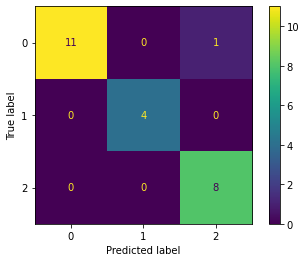

In [19]:
rmcs_preds = rmcs_svm.predict(rmcs_X)

ConfusionMatrixDisplay(confusion_matrix(rmcs_y, rmcs_preds)).plot()

In [22]:
import numpy as np

In [24]:
gmv_preds = np.array(gmv_preds)
r2f_preds = np.array(r2f_preds)
r2sn_preds = np.array(r2sn_preds)
rmcs_preds = np.array(rmcs_preds)

In [25]:
stacked_preds = np.stack((gmv_preds, r2f_preds, r2sn_preds, rmcs_preds))

In [32]:
gmv_preds.shape

(24,)

In [34]:
r2f_preds.shape

(24,)

In [35]:
r2sn_preds.shape

(24,)

In [36]:
rmcs_preds.shape

(24,)

In [33]:
stacked_preds.shape

(4, 24)

In [38]:
stacked_preds

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2,
        2, 2],
       [2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2]], dtype=int8)

In [39]:
y.shape

(24,)

In [62]:
gmv_df

,Unnamed: 0,Unnamed: 0.1,diagnosis,scan_name,roi_0_gmv,roi_1_gmv,roi_2_gmv,roi_3_gmv,roi_4_gmv,roi_5_gmv,...,roi_236_gmv,roi_237_gmv,roi_238_gmv,roi_239_gmv,roi_240_gmv,roi_241_gmv,roi_242_gmv,roi_243_gmv,roi_244_gmv,roi_245_gmv
PTID,,,,,,,,,,,,,,,,,,,,,
099_S_0040,0,0,0,latest_scan,0,0,0,23,0,316,...,0,1,0,10,0,1,0,0,0,0
099_S_0352,1,0,0,latest_scan,162,104,0,0,0,0,...,200,187,61,166,66,40,49,205,145,146
005_S_0221,2,0,0,latest_scan,0,0,0,0,0,0,...,57,100,10,187,43,21,18,171,29,104
136_S_0300,4,0,0,latest_scan,0,0,0,20,0,3,...,0,0,0,0,0,0,0,0,0,0
023_S_0916,5,0,0,latest_scan,0,17,0,156,0,745,...,0,0,0,0,0,0,0,0,0,0
126_S_0784,6,0,0,latest_scan,4,16,0,26,0,319,...,0,4,0,0,0,0,0,13,0,0
127_S_0844,7,0,0,latest_scan,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
023_S_1289,8,0,0,latest_scan,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
027_S_0404,9,0,0,latest_scan,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
ad_svm = SVC(probability=True)
mci_svm = SVC(probability=True)
nl_svm = SVC(probability=True)
out_svm = SVC(probability=True)
X = stacked_preds.T
y = gmv_df['diagnosis']

ad_X = (stacked_preds.T == 0).astype(int)
mci_X = (stacked_preds.T == 1).astype(int)
nl_X = (stacked_preds.T == 2).astype(int)
ad_y = (gmv_df['diagnosis'] == 0).astype(int)
mci_y = (gmv_df['diagnosis'] == 1).astype(int)
nl_y = (gmv_df['diagnosis'] == 2).astype(int)

ad_svm.fit(ad_X, ad_y)
mci_svm.fit(mci_X, mci_y)
nl_svm.fit(nl_X, nl_y)
out_svm.fit(X, y)

SVC(probability=True)

In [64]:
ad_y

PTID
099_S_0040    1
099_S_0352    1
005_S_0221    1
136_S_0300    1
023_S_0916    1
126_S_0784    1
127_S_0844    1
023_S_1289    1
027_S_0404    1
023_S_1104    0
067_S_1253    1
005_S_0814    1
126_S_0606    1
021_S_0626    0
036_S_0869    0
005_S_0572    0
023_S_1190    0
023_S_0058    0
011_S_0022    0
068_S_1191    0
057_S_0643    0
099_S_0533    0
082_S_0640    0
005_S_0223    0
Name: diagnosis, dtype: int64

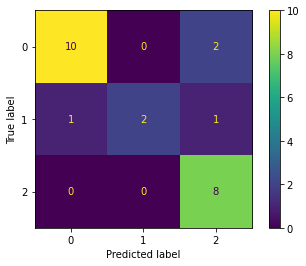

In [76]:
out_preds = out_svm.predict(X)

ConfusionMatrixDisplay(confusion_matrix(y, out_preds)).plot()

In [78]:
from sklearn.multiclass import OneVsRestClassifier

In [79]:
ova = OneVsRestClassifier(out_svm)
ova.fit(X, y)

OneVsRestClassifier(estimator=SVC(probability=True))

In [81]:
ova.predict_proba(X[:3])

array([[0.27116688, 0.1500119 , 0.57882122],
       [0.27116688, 0.1500119 , 0.57882122],
       [0.6364618 , 0.16387812, 0.19966008]])

In [ ]:
ova_probs

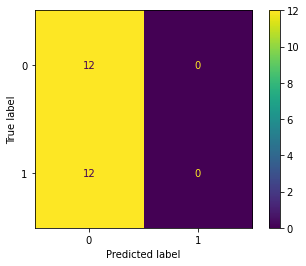

In [66]:
ad_preds = ad_svm.predict(X)

ConfusionMatrixDisplay(confusion_matrix(ad_y, ad_preds)).plot()

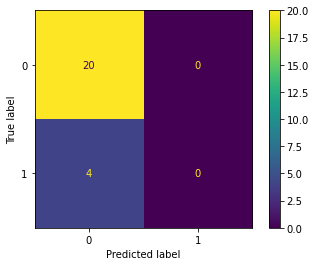

In [67]:
mci_preds = mci_svm.predict(X)

ConfusionMatrixDisplay(confusion_matrix(mci_y, mci_preds)).plot()

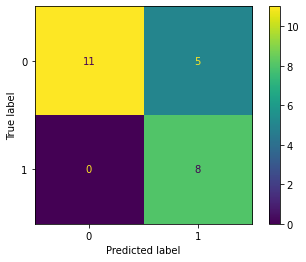

In [68]:
nl_preds = nl_svm.predict(X)

ConfusionMatrixDisplay(confusion_matrix(nl_y, nl_preds)).plot()

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

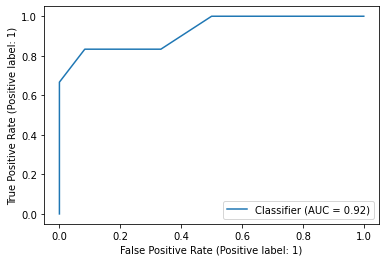

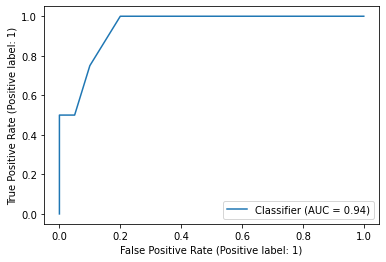

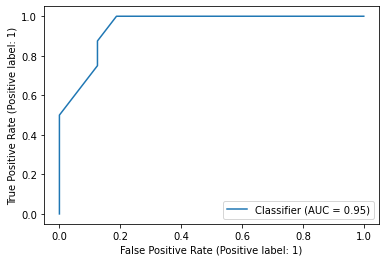

In [87]:
from sklearn.metrics import RocCurveDisplay

# svc_disp = RocCurveDisplay.from_estimator(ova, X, y)
ova_preds = ova.predict_proba(X)

ad_preds = ova_preds[:,0]
mci_preds = ova_preds[:,1]
nl_preds = ova_preds[:,2]

# ad_fpr, ad_tpr, _ = roc_curve(y, ad_preds)
# mci_fpr, mci_tpr, _ = roc_curve(y, mci_preds)
# nl_fpr, nl_tpr, _ = roc_curve(y, nl_preds)

RocCurveDisplay.from_predictions((y == 0).astype(int), ad_preds)
RocCurveDisplay.from_predictions((y == 1).astype(int), mci_preds)
RocCurveDisplay.from_predictions((y == 2).astype(int), nl_preds)

plt.show()

In [86]:
ad_preds

array([0.27116688, 0.27116688, 0.6364618 , 0.70832195, 0.69210738,
       0.69210738, 0.69210738, 0.69210738, 0.69210738, 0.25392054,
       0.69210738, 0.6364618 , 0.70832195, 0.6364618 , 0.37378431,
       0.44017076, 0.37378431, 0.21893453, 0.21271987, 0.26722147,
       0.1997189 , 0.2211204 , 0.27116688, 0.27116688])

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


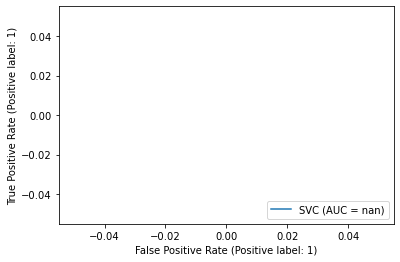

In [73]:
from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_estimator(mci_svm, mci_X, mci_preds)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


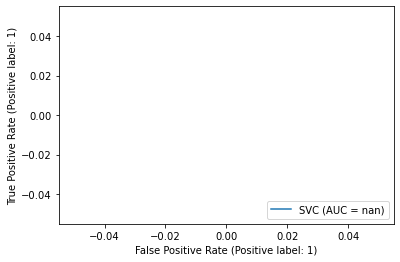

In [74]:
from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_estimator(ad_svm, ad_X, ad_preds)
plt.show()